# Solucion de la ecuacion de calor

## Solución analitica

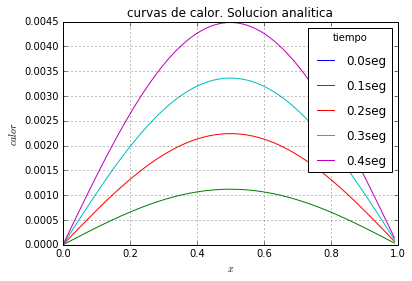

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
# import os; print(os.environ.get('QT_API'))


#Analytic solution
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1.0/alpha)*np.pi/L)**2*t

#define alpha, L
alpha = 1
L = 1

x = np.arange(0,1,0.01)
t0 = 0
dt = 0.1
t = t0

params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$calor$')
plt.title(r'curvas de calor. Solucion analitica')
for i in range(5):
    plt.plot(x,u(x,t),label=str(round(t,1))+'seg')
    plt.legend(labelspacing=1,title="tiempo")
    t+=dt
plt.grid()
plt.show()

## Solucion numerica

In [2]:
def solu_eq_calor(alpha,L,nt,nx,dt,f):
    dx = L/nx
    gamma = alpha*dt/dx**2
    stab_cond=dx**2/(2*alpha)
    
    #chequeo por estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print( "dt = %5.2f"%(dt))
        print("el valor de gamma debe ser: %10.9f"%(stab_cond))
        print("El valor de gamma es: %10.9f"%(gamma))
        return
    tmax=nt*dt
    t = np.arange(t0,tmax,dt)
    x = np.arange(0,L,dx)
    
    w = np.zeros((nx,nt))
    print("dimensiones de w",w.shape)
    
    #condicion inicial
    for i in range(nx):
        w[i,0]=f(x[i])
        
    #condiciones de frontera
    for j in range(nt):
        w[0,j]=0
        w[nx-1,j]=0
    for j in range(0,nt-1):
        #ciclo sobre coordenadas x
        for i in range(1,nx-1):
            w[i,j+1]=(1-2*gamma)*w[i,j]+gamma*(w[i+1,j]+w[i-1,j])
    return w

# Prueba


In [3]:
def f(x):
    return 6*np.sin(np.pi*x/L)
alpha =  1.
L = 1.
nt = 2.
nx = 101
dt = 0.1
solu_eq_calor(alpha,L,nt,nx,dt,f)

error: la condicion de estabilidad fue violada
dt =  0.10
el valor de gamma debe ser: 0.000049015
El valor de gamma es: 1020.100000000


In [4]:
dt = 0.00001
nt = 40001
w = solu_eq_calor(alpha,L,nt,nx,dt,f)

('dimensiones de w', (101, 40001))


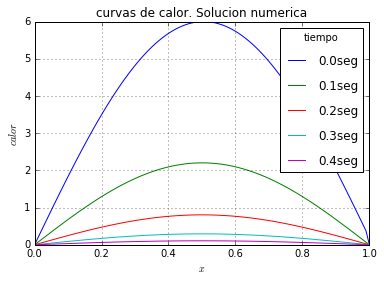

In [5]:
params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$calor$')
plt.title(r'curvas de calor. Solucion numerica')
X = np.linspace(0,L,w.shape[0])
for j in range(0,nt,10000):
    t = j*dt
    plt.plot(X,w[:,j],label=str(round(t,1))+'seg')
    plt.legend(labelspacing=1,title="tiempo")
    
plt.grid(True)
plt.show()

## Error

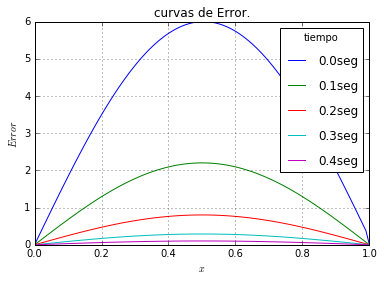

In [6]:
nt = 40001
dt = 0.00001
Nt = int(nt/10000)+1
dx = L/nx
error = np.zeros((nx,Nt))
k = 0
for j in range(0,nt,10000):
    t = j*dt
    for i in range(nx-1):
        x = i*dx
        error[i,k]=w[i,j]-u(x,t)
    k += 1
    
params={'legend.fontsize':5,'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel(r'$Error$')
plt.title(r'curvas de Error.') 

X = np.linspace(0,L,w.shape[0])
Dt = 0.1
for j in range(0,Nt):
    t = j*Dt
    plt.plot(X,error[:,j],label=str(round(t,1))+'seg')
    plt.legend(labelspacing=1,title="tiempo")
plt.grid(True)
plt.show()
